In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [96]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [97]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [98]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [99]:
# Define mapping dictionary
risk_mapping = {'high risk': 3.0, 'mid risk': 2.0, 'low risk': 1.0}

# Convert string column to float using mapping dictionary
df['RiskLevel'] = df['RiskLevel'].map(risk_mapping)


In [100]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


Training and Visualizing a Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

In [103]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [104]:
y.head()

0    3.0
1    3.0
2    3.0
3    3.0
4    1.0
Name: RiskLevel, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(811, 6) (811,) (203, 6) (203,)


In [107]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
847,30,120,80,9.0,101.0,76
332,23,130,70,6.9,98.0,70
707,32,120,90,6.9,98.0,70
218,31,120,60,6.1,98.0,76
425,35,100,60,15.0,98.0,80
...,...,...,...,...,...,...
106,50,140,90,15.0,98.0,90
270,22,120,90,7.0,98.0,82
860,17,90,63,6.9,101.0,70
435,65,130,80,15.0,98.0,86


In [109]:
y_train

847    2.0
332    2.0
707    2.0
218    2.0
425    3.0
      ... 
106    3.0
270    1.0
860    2.0
435    3.0
102    3.0
Name: RiskLevel, Length: 811, dtype: float64

In [110]:
X_train.columns.values

array(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
      dtype=object)

In [111]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.803


In [113]:
y_pred = dt.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.86      0.74      0.79        80
         2.0       0.73      0.84      0.78        76
         3.0       0.87      0.85      0.86        47

    accuracy                           0.80       203
   macro avg       0.82      0.81      0.81       203
weighted avg       0.81      0.80      0.80       203



##After_Preprocessing

In [115]:
df_after = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/After_preprocessing_Maternal-Health-Risk-Data-Set.csv')
df_after.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP,fever
0,25,130,80,15.0,98.0,86,3.0,3.0,0
1,35,140,90,13.0,98.0,70,3.0,3.0,0
2,29,90,70,8.0,100.0,80,3.0,2.0,1
3,30,140,85,7.0,98.0,70,3.0,3.0,0
4,35,120,60,6.1,98.0,76,1.0,2.0,0


In [116]:
After_Feature = df_after.drop(columns = 'RiskLevel')
After_Target = df_after['RiskLevel']

In [117]:
After_Feature

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP,fever
0,25,130,80,15.0,98.0,86,3.0,0
1,35,140,90,13.0,98.0,70,3.0,0
2,29,90,70,8.0,100.0,80,2.0,1
3,30,140,85,7.0,98.0,70,3.0,0
4,35,120,60,6.1,98.0,76,2.0,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2.0,0
1010,55,120,90,18.0,98.0,60,2.0,0
1011,35,85,60,19.0,98.0,86,1.0,0
1012,43,120,90,18.0,98.0,70,2.0,0


In [118]:
After_Target.to_frame()

,RiskLevel
0,3.0
1,3.0
2,3.0
3,3.0
4,1.0
...,...
1009,3.0
1010,3.0
1011,3.0
1012,3.0


In [119]:
from sklearn.model_selection import train_test_split
After_X_train, After_X_test, After_y_train, After_y_test = train_test_split(After_Feature, After_Target, test_size = 0.2, random_state = 42)
print(After_X_train.shape, After_y_train.shape, After_X_test.shape, After_y_test.shape)

(811, 8) (811,) (203, 8) (203,)


In [120]:
After_X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP,fever
847,30,120,80,9.0,101.0,76,3.0,1
332,23,130,70,6.9,98.0,70,2.0,0
707,32,120,90,6.9,98.0,70,3.0,0
218,31,120,60,6.1,98.0,76,2.0,0
425,35,100,60,15.0,98.0,80,2.0,0
...,...,...,...,...,...,...,...,...
106,50,140,90,15.0,98.0,90,3.0,0
270,22,120,90,7.0,98.0,82,3.0,0
860,17,90,63,6.9,101.0,70,2.0,1
435,65,130,80,15.0,98.0,86,2.0,0


In [121]:
After_y_train

847    2.0
332    2.0
707    2.0
218    2.0
425    3.0
      ... 
106    3.0
270    1.0
860    2.0
435    3.0
102    3.0
Name: RiskLevel, Length: 811, dtype: float64

In [122]:
# from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(After_X_train, After_y_train)
print('Accuracy ', accuracy_score(After_y_test, clf.predict(After_X_test)).round(3))

Accuracy  0.813


In [123]:
After_y_pred = clf.predict(After_X_test)

In [124]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(After_y_test, After_y_pred))

              precision    recall  f1-score   support

         1.0       0.86      0.76      0.81        80
         2.0       0.76      0.84      0.80        76
         3.0       0.83      0.85      0.84        47

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



#Confusion Matrix on test Dataset

In [125]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<Axes: >

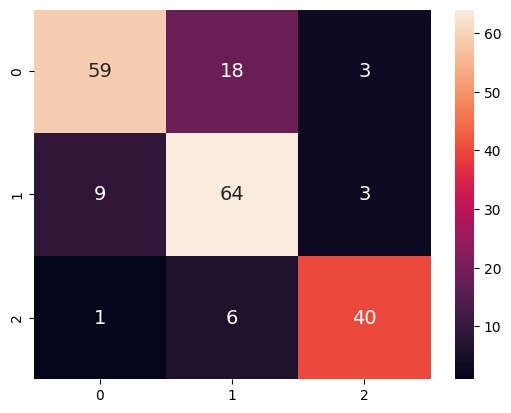

In [126]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

<Axes: >

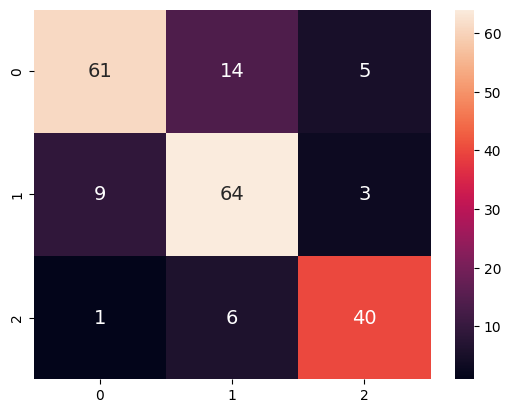

In [127]:
After_cm = confusion_matrix(After_y_test, After_y_pred)
sns.heatmap(After_cm, annot = True)